In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

In [ ]:
import os
os.chdir("/content/drive/My Drive/AIMOOC")
!ls

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Read the data
The data contains 2 columns
* bus wait times between 0 and 60 mins
* height data in ft

In [16]:
pd.set_option('display.max_columns', 500)
df = pd.read_csv("/content/drive/My Drive/AIMOOC/Modules/Module3/Data/distributions.csv")
df

,Uniform,Gaussian
0,8.06,5.81
1,50.85,5.85
2,45.83,5.52
3,15.30,5.32
4,29.73,5.24
...,...,...
195,11.65,5.56
196,6.27,5.78
197,39.96,5.72
198,17.76,5.42


## Plot the histogram to get a sense of the data

(array([ 3.,  4., 11., 28., 36., 53., 30., 25.,  7.,  3.]),
 array([4.82 , 4.952, 5.084, 5.216, 5.348, 5.48 , 5.612, 5.744, 5.876,
        6.008, 6.14 ]),
 <a list of 10 Patch objects>)

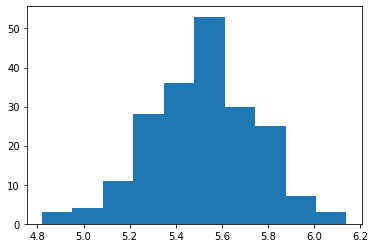

In [17]:
heights = df["Gaussian"]

plt.figure()
plt.hist(df["Gaussian"], bins=10)

## Write a function to help us count data points within a range

In [18]:
def count_data(data, low_end, high_end):
  count = 0
  for i in data:
    if low_end <= i <= high_end:
      count += 1   
  return count

## Probablility of having a height within a range of heights

In [19]:
n_data = 200

# count how many are within 5.3 and 5.8
print("count within 5.3 and 5.8:", count_data(heights, 5.3, 5.8))
print("probability for height within 5.3 and 5.8:",count_data(heights, 5.3, 5.8)/n_data)

count within 5.3 and 5.8: 142
probability for height within 5.3 and 5.8: 0.71


## Show the 68-95-97 rule for Gaussian Distributions in our data

Step 1: Get the mean and standard deviation

In [20]:
mean = heights.mean()
std = heights.std()
print("heights mean is:", mean)
print("heights standard deviation is:", std) 

heights mean is: 5.51355
heights standard deviation is: 0.23287345863943673


Step 2: Use our function to count how many data points fall within
* +/- 1 stddev
* +/- 2 stddev
* +/- 3 stddev

These values should be close to 68-95-97 percent, respectively!

In [21]:
# count how many are within +/- stds
print("within 1 std:", count_data(heights, mean-std, mean+std)/n_data)
print("within 2 std:", count_data(heights, mean-2*std, mean+2*std)/n_data)
print("within 3 std:", count_data(heights, mean-3*std, mean+3*std)/n_data) 

within 1 std: 0.64
within 2 std: 0.955
within 3 std: 1.0


Pretty close!

## What if we have more height data? (200,000 instead of just 200 heights)

In [22]:
# get the data
pd.set_option('display.max_columns', 500)
df = pd.read_csv("/content/drive/My Drive/AIMOOC/Modules/Module3/Data/distributions_200000.csv")
df 

,Uniform,Gaussian
0,8.061855,5.809164
1,50.846024,5.847867
2,45.826477,5.515921
3,15.304142,5.316510
4,29.726105,5.237878
...,...,...
199995,21.098545,5.462735
199996,3.808998,5.816175
199997,38.405598,5.633258
199998,18.413974,5.461462


(array([1.6000e+01, 4.5700e+02, 5.9120e+03, 3.1629e+04, 6.9628e+04,
        6.3978e+04, 2.4476e+04, 3.6690e+03, 2.3000e+02, 5.0000e+00]),
 array([4.34992786, 4.58466035, 4.81939284, 5.05412534, 5.28885783,
        5.52359032, 5.75832281, 5.99305531, 6.2277878 , 6.46252029,
        6.69725278]),
 <a list of 10 Patch objects>)

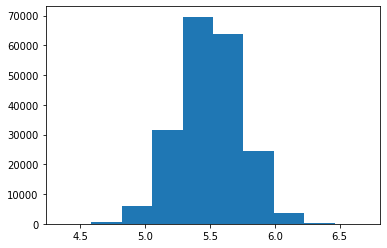

In [23]:
# plot the histogram
heights = df["Gaussian"]

plt.figure()
plt.hist(df["Gaussian"], bins=10) 

In [24]:
# calculate mean and stddev
mean = heights.mean()
std = heights.std()
print("heights mean is:", mean)
print("heights standard deviation is:", std) 

heights mean is: 5.500228934128084
heights standard deviation is: 0.2402506673156612


In [25]:
# count how many are within +/- 1, 2, and 3 stddev
n_data = 200000
print("within 1 std:", count_data(heights, mean-std, mean+std)/n_data)
print("within 2 std:", count_data(heights, mean-2*std, mean+2*std)/n_data)
print("within 3 std:", count_data(heights, mean-3*std, mean+3*std)/n_data) 

within 1 std: 0.6814
within 2 std: 0.954735
within 3 std: 0.997325
